In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

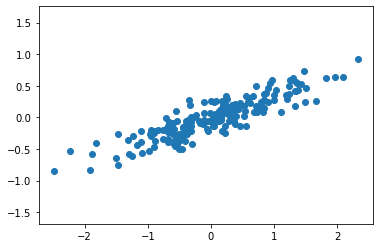

In [2]:
rng=np.random.RandomState(1)
X=(rng.rand(2,2)@rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

In [14]:
pca=PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


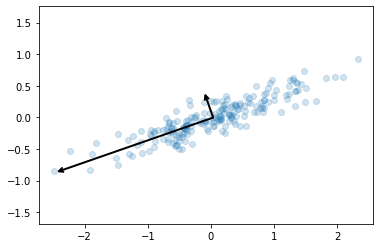

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [18]:
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)

In [20]:
print('original shape: ',X.shape)
print('transformed shape: ',X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389316,
 1.0060642308539953)

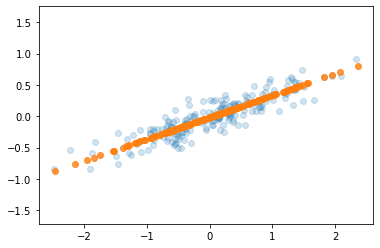

In [23]:
X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal')

In [25]:
X_new.shape

(200, 2)

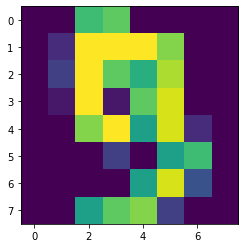

In [50]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape
image=digits.data[9].reshape(8,8)
plt.imshow(image)

In [52]:
pca=PCA(n_components=2)
projected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\Thanh Long\AppData\Local\Temp\ipykernel_8656\1441039736.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


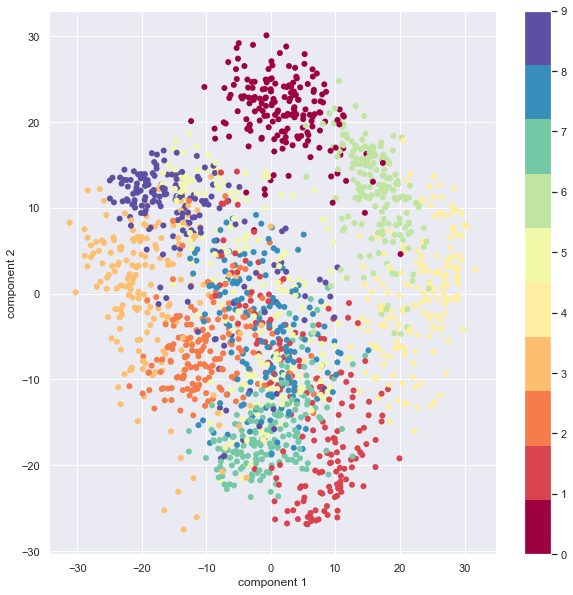

In [58]:
sns.set()
plt.figure(figsize=[10,10])
plt.scatter(projected[:,0],projected[:,1],
            c=digits.target,edgecolor='none',
            cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()